## Exploratory Data Analysis

### Data Description

The dataset consists of variables measuring **perceptions of climate change impact, support for policies, willingness to pay (WTP) for climate policies and political affiliation and ideology**

#### Climate Change Perception Variables (`cc4_*`)
- **`cc4_world`**: Perceived extent to which global warming is harming the **world**
- **`cc4_wealthUS`**: Perceived harm of climate change on **wealthy communities** in the U.S.
- **`cc4_poorUS`**: Perceived harm of climate change on **poor communities** in the U.S.
- **`cc4_comm`**: Perceived impact of climate change on **local communities**
- **`cc4_famheal`**: Perceived impact of climate change on **family health**
- **`cc4_famecon`**: Perceived impact of climate change on **family economic well-being**

#### Willingness to Pay for Climate Policies (`ccSolve*`)
- **`ccSolve100`**: Support for climate policies if they cost **$100 per month**
- **`ccSolve50`**: Support for climate policies if they cost **$50 per month**
- **`ccSolve10`**: Support for climate policies if they cost **$10 per month**
- **`ccSolve1`**: Support for climate policies if they cost **$1 per month**
- **`ccSolve0`**: Support for climate policies **without specifying a cost**

#### Climate Policy Support (`cc_pol_*`)
- **`cc_pol_tax`**: Support for a **carbon tax** to reduce emissions
- **`cc_pol_car`**: Support for **stronger emissions standards for car manufacturers**

#### Political Affiliation and Ideology  (`pol_*`)
- **`pol_party`**: **Political party** identification (Republican, Leaning Republican, Independent, Leaning Democrat, Democrat)
- **`pol_ideology`**: **Political ideology** identification (Very Conservative, Conservative, Moderate, Liberal, Very Liberal)

### Data Preparation

#### Check for duplicate PIDs in the dataset

In [29]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('../data/w1w2w3w4w5_indices_weights_jul12_2022.csv', low_memory=False)

# Check for duplicate PIDs
duplicate_pids = df[df.duplicated('PID', keep=False)]

if not duplicate_pids.empty:
    print("There are duplicate PIDs in the dataset")
    duplicate_pids.to_csv('../data/0-duplicate_pids.csv', index=False)
    print("Duplicate PIDs have been saved to '../data/0-duplicate_pids.csv'.")
else:
    print("All PIDs are unique.")

There are duplicate PIDs in the dataset
Duplicate PIDs have been saved to '../data/0-duplicate_pids.csv'.


In the above section we filter the participants who participated in more than one wave and we group the responses by the PID

---
#### Filter Wave Survey Data

In [30]:
# Load the CSV file
df = pd.read_csv("../data/0-duplicate_pids.csv", low_memory=False)

# Identify valid sequences (rolling window approach)
df['valid_seq'] = df['WAVE'].rolling(3).apply(lambda x: list(x) == [2,3,4], raw=True)

# Flag rows belonging to valid sequences
df['keep'] = df['valid_seq'].shift(-2).fillna(0).astype(bool) | df['valid_seq'].shift(-1).fillna(0).astype(bool) | df['valid_seq'].fillna(0).astype(bool)

# Filter the rows
filtered_df = df[df['keep']].drop(columns=['valid_seq', 'keep'])

# Save to a new CSV file
filtered_df.to_csv("../data/1-filtered_wave_data.csv", index=False)

print("Waves 2,3,4 data saved to 1-filtered_wave_data.csv")

Waves 2,3,4 data saved to 1-filtered_wave_data.csv


In the above section we filter the participants who responded in waves 2 and 3 and 4 (in this order)

---
#### Data Summary of Raw Data

In [31]:
import pandas as pd

from skimpy import skim  # Equivalent to skimr::skim() in R

# Load your dataset
df = pd.read_csv('../data/1-filtered_wave_data.csv', low_memory=False)

# Select only the relevant numeric variables
columns_of_interest = [
    "cc4_world", "cc4_wealthUS", "cc4_poorUS", "cc4_comm", "cc4_famheal", "cc4_famecon", "ccSolve100", "ccSolve50", "ccSolve10", "ccSolve1", "ccSolve0", "cc_pol_tax", "cc_pol_car", "pol_party", "pol_lean", "pol_ideology", "dem_income", "dem_educ", "dem_age", "dem_male"
]

df_selected = df[columns_of_interest]

# Drop non-numeric columns (if any) and check correlations
df_numeric = df_selected.select_dtypes(include=['number'])

# Display summary statistics (equivalent to skimr::skim())
skim(df_numeric)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5667   │ │ float64     │ 11    │                                                          │
│ │ Number of columns │ 20     │ │ int64       │ 9     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA    ┃ NA %                 ┃ mean    ┃ sd      ┃ p0  ┃ p25  ┃ p50 ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ cc4_world      │     0 │                    0 │   2.971 │   0.994 │   1 │    2 │   3 │   4 │    4 │ ▂ ▅ ▇▇ │  │
│ │ cc4_wealthUS   │     0 │                    0 │   2.336 │    1.01 │   1 │    2 │   2 │   3 │    4 │ ▆ ▇ ▆▃ │  │
│ │ cc4_poorUS     │     0 │                    0 │   2.797 │   1.053 │   1 │    2 │   3 │   4 │    4 │ ▃ ▅ ▇▇ │  │
│ │ cc4_comm       │     0 │                    0 │   2.464 │  0.9879 │   1 │    2 │   2 │   3 │    4 │ ▅ ▇ ▇▅ │  │
│ │ cc4_famheal    │     0 │                    0 │   2.262 │    1.01 │   1 │    1 │   2 │   3 │    4 │ ▇ ▇ ▆▃ │  │
│ │ cc4_famecon    │     0 │                    0 │   1.959 │   1.021 │   1 │    1 │   2 │   3 │    4 │ ▇ ▅ ▃▂ │  │
│ │ ccSolve100     │  4521 │    79.77766013763896 │   2.469 │   1.261 │   1 │    1 │ 2.5 │   3 │    5 │ ▇▅ ▇▃▂ │  │
│ │ ccSolve50      │  4536 │    80.04235044997353 │   2.606 │   1.287 │   1 │    1 │   3 │   4 │    5 │ ▇▅ ▇▅▂ │  │
│ │ ccSolve10      │  4549 │     80.2717487206635 │   2.959 │   1.327 │   1 │    2 │   3 │   4 │    5 │ ▆▃ ▇▇▃ │  │
│ │ ccSolve1       │  4542 │    80.14822657490735 │   3.309 │   1.367 │   1 │    3 │   3 │   4 │    5 │ ▅▂ ▇▇▇ │  │
│ │ ccSolve0       │  4520 │    79.76001411681666 │   3.402 │   1.275 │   1 │    3 │   4 │   4 │    5 │ ▃▂ ▇▇▆ │  │
│ │ cc_pol_tax     │    25 │   0.4411505205576143 │   3.193 │   1.314 │   1 │    2 │   3 │   4 │    5 │ ▅▃ ▇▇▅ │  │
│ │ cc_pol_car     │    25 │   0.4411505205576143 │   3.717 │    1.23 │   1 │    3 │   4 │   5 │    5 │ ▂▂ ▅▇▇ │  │
│ │ pol_party      │     0 │                    0 │   2.016 │  0.7888 │   1 │    1 │   2 │   3 │    3 │ ▆  ▇ ▇ │  │
│ │ pol_lean       │  3858 │    68.07834833245103 │   2.758 │   1.265 │   1 │    2 │   2 │   4 │    4 │ ▃ ▅  ▇ │  │
│ │ pol_ideology   │     0 │                    0 │   2.887 │   1.068 │   1 │    2 │   3 │   3 │    5 │ ▂▃ ▇▃▂ │  │
│ │ dem_income     │     0 │                    0 │   3.314 │   1.543 │   1 │    2 │   3 │   5 │    6 │ ▅▇▇▅▇▂ │  │
│ │ dem_educ       │     0 │                    0 │   3.611 │   1.601 │   1 │    2 │   3 │   5 │    6 │ ▁▇▃▂▅▃ │  │
│ │ dem_age        │     0 │                    0 │   54.28 │   15.16 │  18 │   42 │  56 │  67 │   93 │ ▂▅▆▇▆▁ │  │
│ │ dem_male       │     0 │                    0 │  0.6174 │    3.25 │   0 │    0 │   0 │   1 │   77 │   ▇    │  │
│ └────────────────┴───────┴──────────────────────┴─────────┴─────────┴─────┴──────┴─────┴─────┴──────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Dataset Summary
The dataset contains **5,667 observations** and **16 variables** capturing attitudes toward climate change, policy preferences, political orientation, and willingness to financially support climate solutions. It includes **11 float-type** and **5 integer-type** columns.

### Missing Data
Most variables are complete, except for the following:

- The `ccSolve` variables (`ccSolve0`, `ccSolve100`, `ccSolve50`, `ccSolve10`, `ccSolve1`) each have approximately **80% missing values**. This is **by design**: each respondent was presented with only **one** version of the willingness-to-pay (WTP) or general support question, not all five.
- `cc_pol_tax` and `cc_pol_car` each have **25 missing values** (~0.44% of the sample)
- `pol_lean` has around **68% missing values**, which is also **by design**, as it was only asked of respondents who self-identified as **politically independent**.

### Measurement Scales
- `cc4_*` variables are measured on a **1–4 scale** representing agreement with statements about climate impacts.
- `ccSolveX` variables are measured on a **1–5 Likert scale** indicating approval of public climate spending, at different levels of cost.
- `ccSolve0` is a general approval measure for public climate finance, not tied to specific monetary amounts.
- `cc_pol_tax` and `cc_pol_car` capture support for climate policies on a **1–5 scale**.
- `pol_party` is on a **1–3 scale** (e.g., Democrat, Independent, Republican), while `pol_ideology` and `pol_lean` are on **1–5 scales**, capturing the respondent’s political ideology or leaning.

### Key Variable Distributions and Trends
#### Climate Concern (`cc4_*`):
- Mean values range from **1.96 (`cc4_famecon`)** to **2.97 (`cc4_world`)**, showing **moderate to strong agreement** that climate change affects the world and vulnerable groups, but less concern about personal health and financial consequences.
- The data suggest that people are **more concerned about collective and global consequences** than personal ones.

#### Willingness to Pay and General Support:
- As the **cost of proposed climate policy decreases**, **support increases**:
  - `ccSolve100`: mean = 2.47
  - `ccSolve50`: mean = 2.61
  - `ccSolve10`: mean = 2.96
  - `ccSolve1`: mean = 3.31
- `ccSolve0` (mean = 3.40) represents **general approval** of climate funding and is **not tied to a specific cost**. It consistently shows **higher support**, indicating that people are **more willing to approve climate action in principle** than when actual costs are presented.

#### Climate Policy Support:
- Support is higher for **transportation-based policies** (`cc_pol_car`: mean = 3.72) than for **carbon taxation** (`cc_pol_tax`: mean = 3.19).

#### Political Orientation:
- `pol_party` (mean = 2.02 on a 1–3 scale) suggests a **center-left leaning sample** overall.
- `pol_ideology` (mean = 2.89) supports this, with a slight skew toward progressive or moderate views.
- `pol_lean` is only populated for independents

### Distribution Observations
- Most variables are **skewed**, with peaks around the middle or upper-middle values.
- The WTP variables show **clear positive skew**: more people support cheaper climate actions than expensive ones.
- The `cc4_*` variables cluster around **2 and 3**, showing mixed or moderate agreement.

---

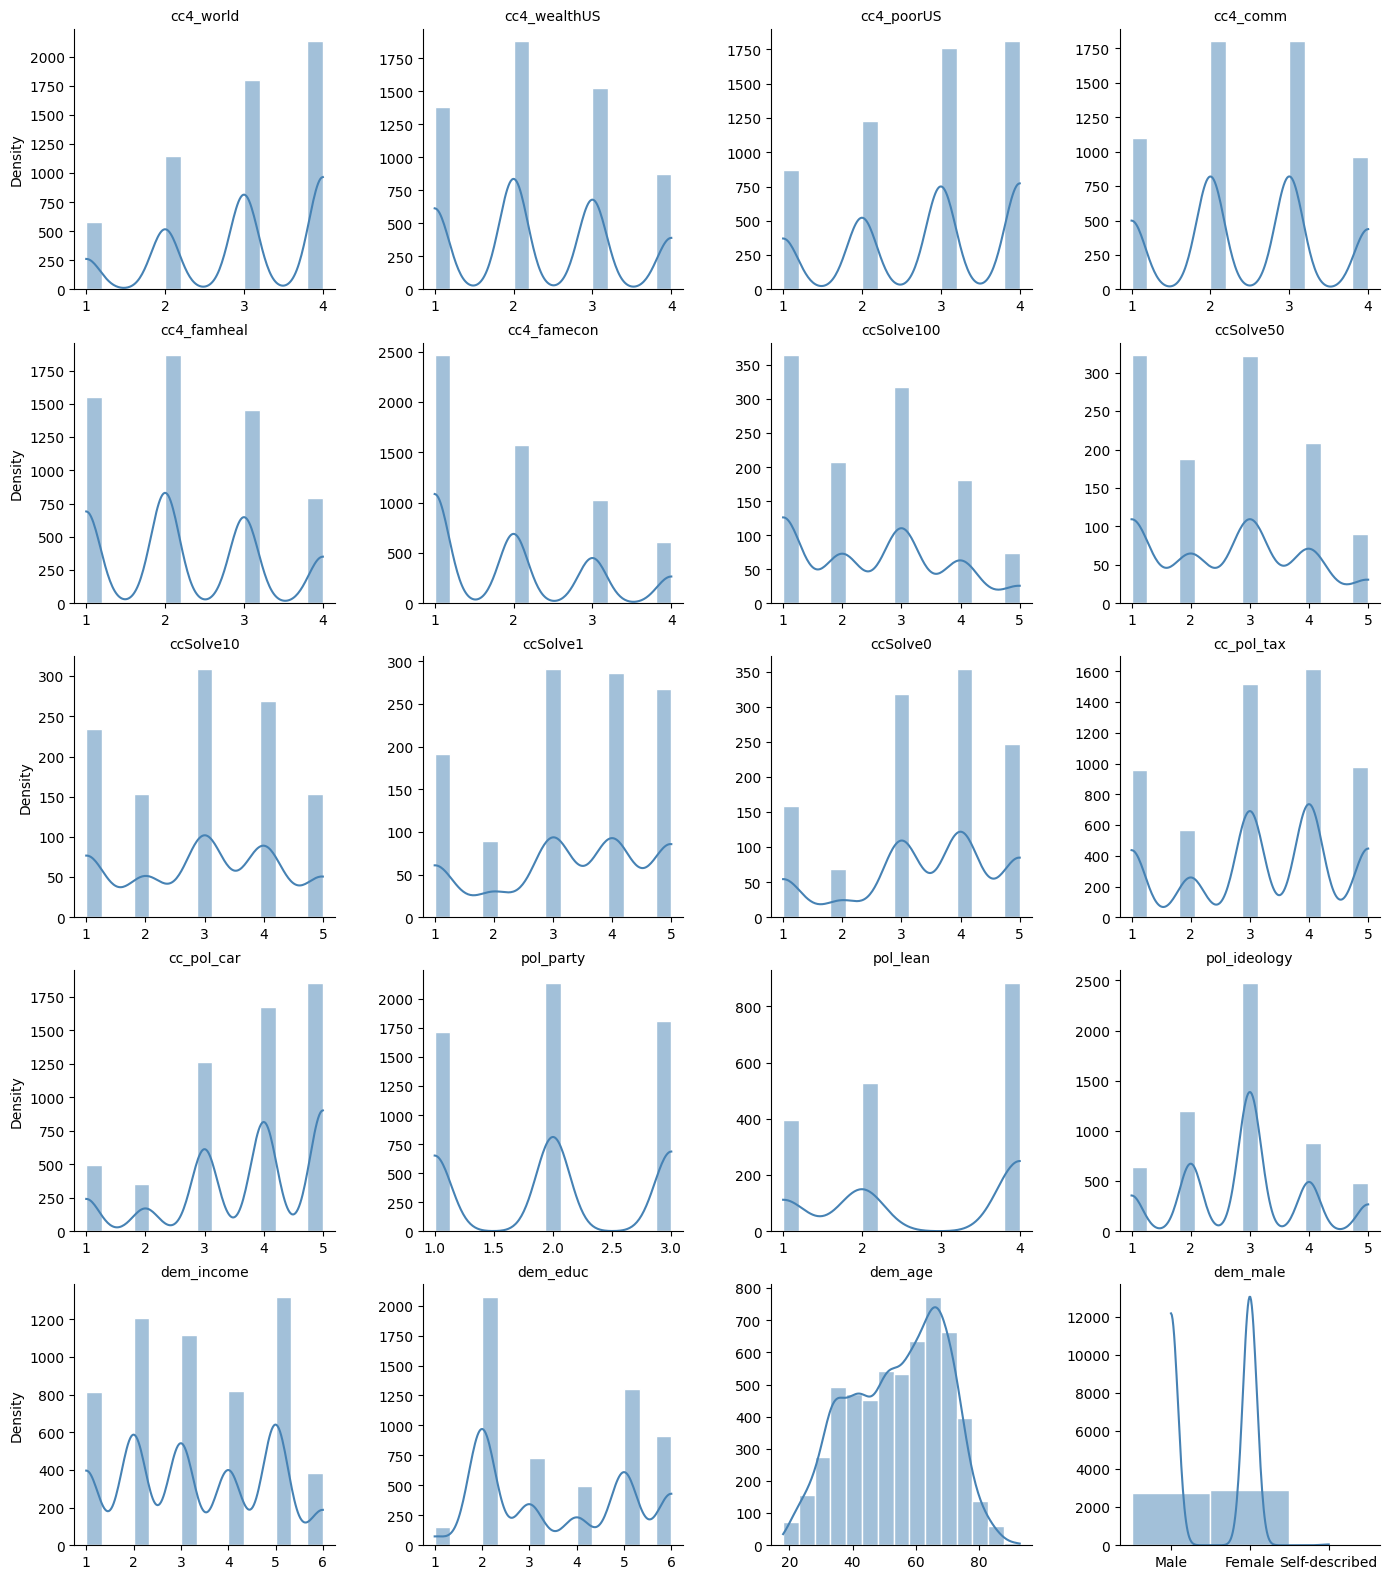

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
df = pd.read_csv('../data/1-filtered_wave_data.csv', low_memory=False)

# Mapping for gender labels
gender_map = {0: 'Female', 1: 'Male', 77: 'Self-described'}
df['dem_male_labeled'] = df['dem_male'].map(gender_map)

# Replace 'dem_male' with the labeled version in the plotting dataframe
columns_of_interest = [
    "cc4_world", "cc4_wealthUS", "cc4_poorUS", "cc4_comm", "cc4_famheal", "cc4_famecon",
    "ccSolve100", "ccSolve50", "ccSolve10", "ccSolve1", "ccSolve0",
    "cc_pol_tax", "cc_pol_car", "pol_party", "pol_lean", "pol_ideology",
    "dem_income", "dem_educ", "dem_age", "dem_male_labeled"  # <--- use labeled version
]

df_num = df[columns_of_interest].copy()
df_num = df_num.rename(columns={'dem_male_labeled': 'dem_male'})  # rename for plotting

# Reshape data to long format for plotting
df_long = df_num.melt(var_name="variable", value_name="value")

# Plot
g = sns.FacetGrid(df_long, col="variable", col_wrap=4, sharex=False, sharey=False, height=3.5)

def smart_histplot(data, x, **kwargs):
    # If categorical (i.e., contains gender labels), use countplot
    if x == 'dem_male':
        sns.countplot(x=x, data=data, color="steelblue", edgecolor="white")
    else:
        sns.histplot(x=x, data=data, bins=15, kde=True, color="steelblue", edgecolor="white")

g.map_dataframe(smart_histplot, x="value")

g.set_titles(col_template="{col_name}")
g.set_axis_labels("", "Density")
plt.subplots_adjust(top=0.9)

# Save the figure
g.savefig("../results/distribution_raw.png", dpi=600, bbox_inches="tight")

plt.show()

In [33]:
import pandas as pd

# Load your dataset (ideally the unfiltered one with all PIDs)
df = pd.read_csv('../data/1-filtered_wave_data.csv', low_memory=False)

# Drop duplicates to count each respondent only once
df_unique = df.drop_duplicates(subset='PID')

# Calculate proportions of dem_male categories
gender_counts = df_unique['dem_male'].value_counts(normalize=True) * 100

# Optional: round and display nicely
gender_percentages = gender_counts.round(1).to_dict()

print("Gender breakdown:")
for code, label in {0: 'Female', 1: 'Male', 77: 'Self-described'}.items():
    percent = gender_percentages.get(code, 0.0)
    print(f"{label} = {percent:.1f}%")

Gender breakdown:
Female = 52.4%
Male = 47.4%
Self-described = 0.1%


---
#### Likert Scale Standardization

In [34]:
import pandas as pd
import numpy as np

# Load the CSV file from the data directory
df = pd.read_csv('../data/1-filtered_wave_data.csv', low_memory=False)

# Some variables use a five-point Likert scale (1 to 5), while others use a four-point scale (1 to 4)
# Since some scales are missing a neutral category (like 3), we need to standardize them
# We chose to rescale the 1-4 scale to match the 1-5 scale by applying a linear transformation:
# 1 (Not at all)         → 1
# 2 (Only a little)      → 2.33
# 3 (A moderate amount)  → 3.67
# 4 (A great deal)       → 5
mapping = {1: 1, 2: 2.33, 3: 3.67, 4: 5}

# List of variables to be mapped
variables_to_map = ['cc4_world', 'cc4_wealthUS', 'cc4_poorUS', 'cc4_comm', 'cc4_famheal', 'cc4_famecon']

# Apply the mapping to the specified variables
for var in variables_to_map:
    df[var] = df[var].map(mapping)

print("Harm perception variables (cc4_world, cc4_wealthUS, cc4_poorUS, cc4_comm, cc4_famheal, cc4_famecon) have been transformed into a 1-5 Likert scale")

# Compute political score: Democrat = -2, Independent leaning Dem = -1,
# Independent leaning neither = 0, Independent leaning Rep = 1, Republican = 2
def compute_pol_score(row):
    if row['pol_party'] == 2:
        return -2
    if row['pol_party'] == 1:
        return 2
    if row['pol_party'] == 3:  # Independent
        lean = row.get('pol_lean', np.nan)
        if lean == 2:
            return -1
        if lean == 4:
            return 0
        if lean == 1:
            return 1
    return np.nan

df['pol_score'] = df.apply(compute_pol_score, axis=1)
print("Political ideology has been encoded into a continuum from -2 to 2 and stored in 'pol_score'.")

# Save the cleaned data to a new CSV file
df.to_csv('../data/2-likert_scale.csv', index=False)

print("Data has been standardized and saved to 'data/likert_scale.csv'")

Harm perception variables (cc4_world, cc4_wealthUS, cc4_poorUS, cc4_comm, cc4_famheal, cc4_famecon) have been transformed into a 1-5 Likert scale
Political ideology has been encoded into a continuum from -2 to 2 and stored in 'pol_score'.
Data has been standardized and saved to 'data/likert_scale.csv'


In the above section we rescale the 1-4 scale and the 1-3 scale of some variables to match the 1-5 scale

---
#### Fill missing values

In [35]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/2-likert_scale.csv", low_memory=False)

# Define policy-related columns
cc_policy_columns = ["cc_pol_tax", "cc_pol_car"]

# Fill missing values with 3 (Neutral)
for cc_policy in cc_policy_columns:
    df[cc_policy] = df[cc_policy].fillna(3)

# Save the updated dataset
df.to_csv("../data/3-missing_pol_values_filled_data.csv", index=False)

print("Missing values in policy variables filled and saved in 3-missing_pol_values_filled_data.csv")

Missing values in policy variables filled and saved in 3-missing_pol_values_filled_data.csv


---
#### Create scaled climate support score from single WTP response

In [36]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("../data/3-missing_pol_values_filled_data.csv", low_memory=False)

# Define ccSolve variables and their dollar values
ccSolve_amounts = {
    "ccSolve100": 100,
    "ccSolve50": 50,
    "ccSolve10": 10,
    "ccSolve1": 1
}
ccSolve_columns = list(ccSolve_amounts.keys())

# Drop rows where none of the ccSolve variables are answered
df = df.dropna(subset=ccSolve_columns, how="all")

# Create support_dollars based on the one answered ccSolve variable
def get_support_dollars(row):
    for col, amount in ccSolve_amounts.items():
        if pd.notna(row[col]):
            return row[col] * amount
    return np.nan

df["ccSolve_support_dollars"] = df.apply(get_support_dollars, axis=1)

# Rescale support dollars to a 1–5 scale
min_val = df["ccSolve_support_dollars"].min()
max_val = df["ccSolve_support_dollars"].max()
df["ccSolve"] = 1 + 4 * (df["ccSolve_support_dollars"] - min_val) / (max_val - min_val)

# Round to the nearest whole number and convert to integer (1–5 scale)
df["ccSolve"] = df["ccSolve"].round().astype(int)

# Drop original ccSolveX columns
df.drop(columns=ccSolve_columns, inplace=True)

# Save cleaned dataset
df.to_csv("../data/4-cleaned_data.csv", index=False)

print("Final dataset saved as '4-cleaned_data.csv' with 'ccSolve' rounded to 1–5 scale based on responses")

Final dataset saved as '4-cleaned_data.csv' with 'ccSolve' rounded to 1–5 scale based on responses


In the above section we create a single, scaled measure of willingness to financially support climate action (ccSolve) by converting a respondent's answer to one cost-specific scenario into a dollar-weighted score, rescaling it to a 1–5 scale, rounding it, and removing the original input variables

---
#### Create simplified binary versions of demographic variables 

In [37]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
df = pd.read_csv("../data/4-cleaned_data.csv", low_memory=False)

# ---- Recode dem_income ----
# Aggregate 1-4 as 'Low' (0), 5-6 as 'High' (1)
df['dem_income'] = df['dem_income'].apply(lambda x: 0 if x in [1, 2, 3, 4] else (1 if x in [5, 6] else np.nan))

# ---- Recode dem_educ ----
# Aggregate 1-5 as 'Low' (0), 6 as 'High' (1)
df['dem_educ'] = df['dem_educ'].apply(lambda x: 0 if x in [1, 2, 3, 4, 5] else (1 if x == 6 else np.nan))

# ---- Recode dem_male ----
# Aggregate 0 (Female) and 77 (Self-described) together as 0; 1 (Male) stays as 1
df['dem_male'] = df['dem_male'].apply(lambda x: 1 if x == 1 else (0 if x in [0, 77] else np.nan))

# Save the reprocessed dataset
df.to_csv("../data/4-cleaned_data_2.csv", index=False)

print("Dataset saved as '4-cleaned_data_2.csv' with binary demographic variables replacing the originals.")

Dataset saved as '4-cleaned_data_2.csv' with binary demographic variables replacing the originals.


In this step, we recode three demographic variables to create simplified binary versions for analysis. Household income (`dem_income`) is aggregated into "low" and "high" categories, education level (`dem_educ`) is recoded to distinguish between lower and advanced degrees, and gender (`dem_male`) is recoded to group female and self-described respondents together, while keeping male respondents distinct.

---
#### Filter to Participants with Complete Responses Across All Three Waves

In [38]:
import pandas as pd

# Load the data
df = pd.read_csv("../data/4-cleaned_data_2.csv", low_memory=False)

# Count how many unique waves each participant has
wave_counts = df.groupby('PID')['WAVE'].nunique()

# Keep only those who appear in all 3 waves
complete_pids = wave_counts[wave_counts == 3].index

# Filter the original dataset
df_balanced = df[df['PID'].isin(complete_pids)]

# Save the cleaned dataset
df_balanced.to_csv("../data/5-cleaned_data_3waves.csv", index=False)

print(f"Saved {df_balanced.shape[0]} rows with complete panel data to 5-cleaned_data_3waves.csv")

Saved 2583 rows with complete panel data to 5-cleaned_data_3waves.csv


### Data Summary

In [39]:
from skimpy import skim  # Equivalent to skimr::skim() in R

# Load your dataset
df = pd.read_csv('../data/5-cleaned_data_3waves.csv', low_memory=False)

# Select only the relevant numeric variables
columns_of_interest = [
    "cc4_world", "cc4_wealthUS", "cc4_poorUS", "cc4_comm", "cc4_famheal", "cc4_famecon", "ccSolve", "cc_pol_tax", "cc_pol_car", "pol_score", "pol_ideology", "dem_income", "dem_educ", "dem_age", "dem_male"
]

df_selected = df[columns_of_interest]

# Drop non-numeric columns (if any) and check correlations
df_numeric = df_selected.select_dtypes(include=['number'])

# Display summary statistics (equivalent to skimr::skim())
skim(df_numeric)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2583   │ │ float64     │ 8     │                                                          │
│ │ Number of columns │ 15     │ │ int64       │ 7     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column           ┃ NA   ┃ NA %   ┃ mean       ┃ sd       ┃ p0  ┃ p25    ┃ p50    ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ cc4_world        │    0 │      0 │      3.643 │    1.308 │   1 │   2.33 │   3.67 │     5 │     5 │ ▂▅  ▇▇  │  │
│ │ cc4_wealthUS     │    0 │      0 │      2.767 │     1.35 │   1 │   2.33 │   2.33 │  3.67 │     5 │ ▆▇  ▆▃  │  │
│ │ cc4_poorUS       │    0 │      0 │      3.401 │    1.407 │   1 │   2.33 │   3.67 │     5 │     5 │ ▃▅  ▇▇  │  │
│ │ cc4_comm         │    0 │      0 │      2.932 │     1.31 │   1 │   2.33 │   2.33 │  3.67 │     5 │ ▅▇  ▇▅  │  │
│ │ cc4_famheal      │    0 │      0 │      2.664 │    1.321 │   1 │      1 │   2.33 │  3.67 │     5 │ ▆▇  ▆▃  │  │
│ │ cc4_famecon      │    0 │      0 │      2.245 │    1.337 │   1 │      1 │   2.33 │  3.67 │     5 │ ▇▅  ▃▂  │  │
│ │ ccSolve          │    0 │      0 │      1.732 │   0.9707 │   1 │      1 │      1 │     2 │     5 │  ▇▃ ▃▁  │  │
│ │ cc_pol_tax       │    0 │      0 │      3.182 │    1.299 │   1 │      2 │      3 │     4 │     5 │ ▅▃ ▇▇▅  │  │
│ │ cc_pol_car       │    0 │      0 │      3.713 │    1.218 │   1 │      3 │      4 │     5 │     5 │ ▂▂ ▆▇▇  │  │
│ │ pol_score        │    0 │      0 │    -0.1754 │    1.697 │  -2 │     -2 │      0 │     2 │     2 │ ▇▂ ▃▂▆  │  │
│ │ pol_ideology     │    0 │      0 │      2.886 │    1.054 │   1 │      2 │      3 │     3 │     5 │ ▂▅ ▇▃▁  │  │
│ │ dem_income       │    0 │      0 │     0.3043 │   0.4602 │   0 │      0 │      0 │     1 │     1 │ ▇    ▃  │  │
│ │ dem_educ         │    0 │      0 │     0.1409 │    0.348 │   0 │      0 │      0 │     0 │     1 │ ▇    ▁  │  │
│ │ dem_age          │    0 │      0 │      55.47 │     14.8 │  19 │     43 │     58 │    67 │    93 │ ▁▅▅▇▅▁  │  │
│ │ dem_male         │    0 │      0 │     0.4766 │   0.4995 │   0 │      0 │      0 │     1 │     1 │ ▇    ▇  │  │
│ └──────────────────┴──────┴────────┴────────────┴──────────┴─────┴────────┴────────┴───────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

The cleaned version of the dataset includes only respondents who answered at least one of the cost-specific willingness-to-pay questions. These were combined into a single `ccSolve` variable, scaled and rounded to a 1–5 Likert scale. The original `ccSolveX` variables, including `ccSolve0`, were dropped due to high missingness. Political identity was recoded into a unified `pol_score` variable, ranging from -2 (Democrat) to 2 (Republican), based on both `pol_party` and `pol_lean`. The final dataset contains 4,520 rows.

### Numerical Data Distribution

#### Distribution of All Variables with Density Overlay

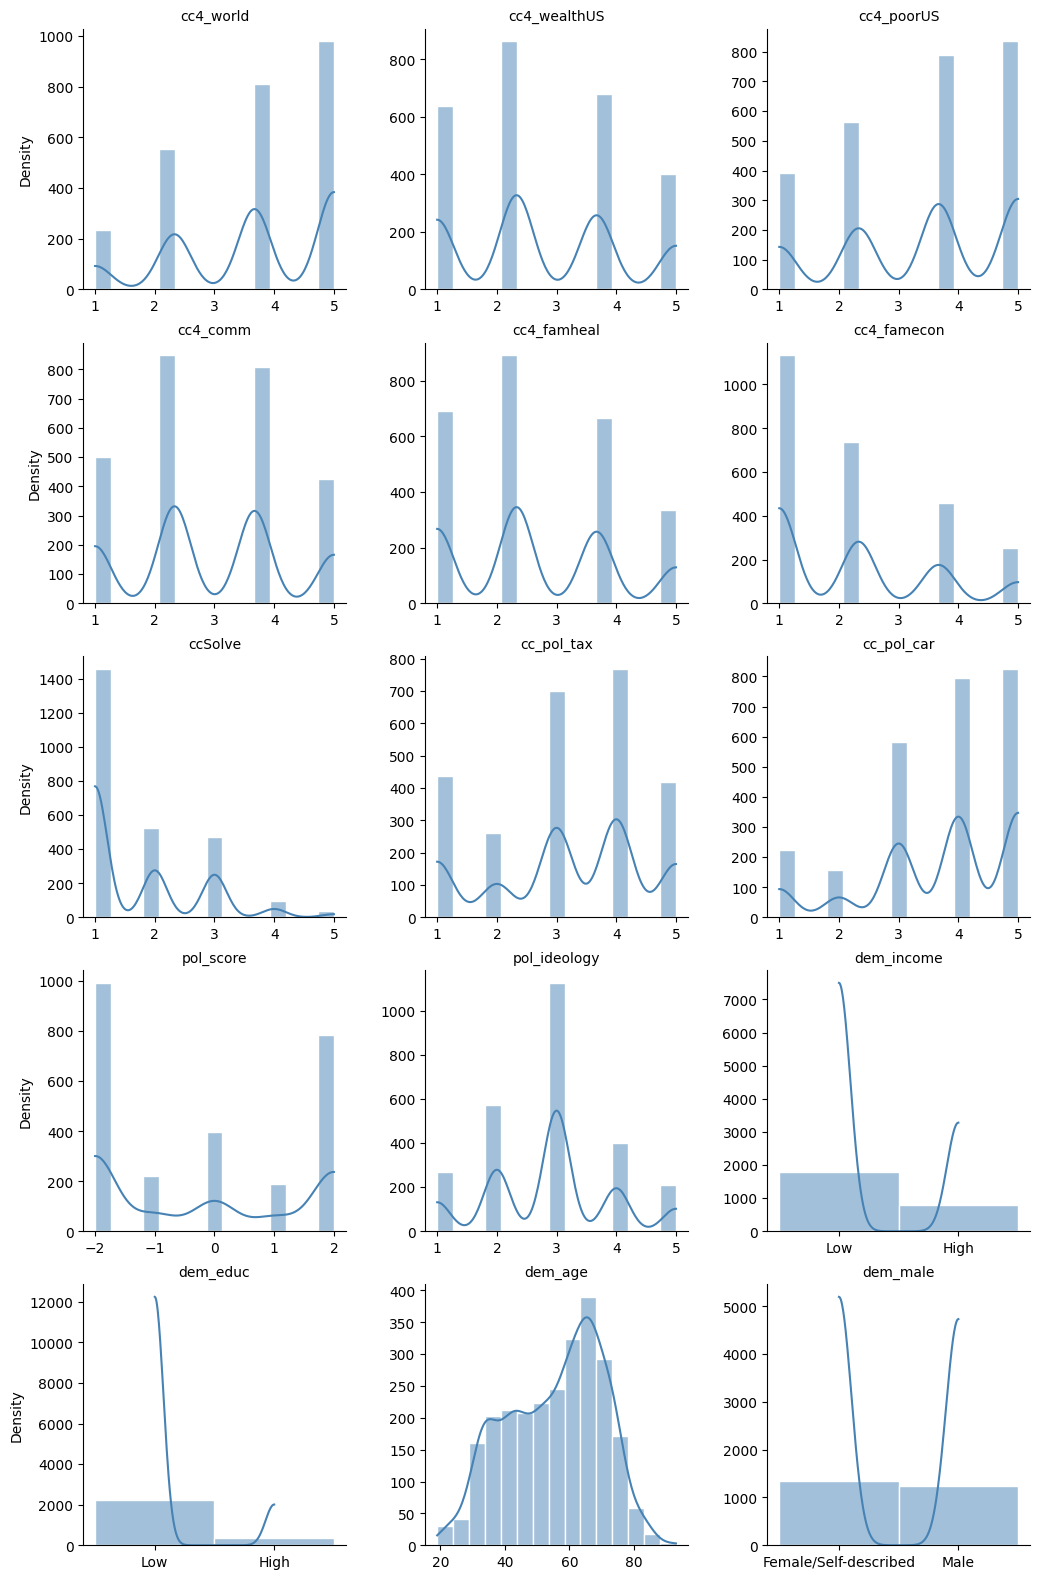

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the filtered dataset
df = pd.read_csv('../data/5-cleaned_data_3waves.csv', low_memory=False)

# Relabel dem_male
df['dem_gender'] = df['dem_male'].map({1: 'Male', 0: 'Female/Self-described', 77: 'Female/Self-described'})

# Relabel dem_income
df['dem_income_label'] = df['dem_income'].map({0: 'Low', 1: 'High'})

# Relabel dem_educ
df['dem_educ_label'] = df['dem_educ'].map({0: 'Low', 1: 'High'})

# Replace original column names with labeled ones for plotting
columns_of_interest = [
    "cc4_world", "cc4_wealthUS", "cc4_poorUS", "cc4_comm", "cc4_famheal", "cc4_famecon",
    "ccSolve", "cc_pol_tax", "cc_pol_car", "pol_score", "pol_ideology",
    "dem_income_label", "dem_educ_label", "dem_age", "dem_gender"
]

# Rename for consistent plotting
df_plot = df[columns_of_interest].rename(columns={
    'dem_income_label': 'dem_income',
    'dem_educ_label': 'dem_educ',
    'dem_gender': 'dem_male'
})

# Reshape to long format
df_long = df_plot.melt(var_name="variable", value_name="value")

# Plot setup
g = sns.FacetGrid(df_long, col="variable", col_wrap=3, sharex=False, sharey=False, height=3.5)

# Conditional plotting logic
def custom_plot(data, x, **kwargs):
    if x in ['dem_male', 'dem_income', 'dem_educ']:
        sns.countplot(x=x, data=data, color="steelblue", edgecolor="white",
                      order=['Low', 'High'] if x != 'dem_male' else ['Female/Self-described', 'Male'])
    else:
        sns.histplot(x=x, data=data, bins=15, kde=True, color="steelblue", edgecolor="white")

g.map_dataframe(custom_plot, x="value")

g.set_titles(col_template="{col_name}")
g.set_axis_labels("", "Density")
plt.subplots_adjust(top=0.9)

# Save the figure
g.savefig("../results/distribution_filtered.png", dpi=600, bbox_inches="tight")

# Show the plot
plt.show()

#### Key Observations
1. **Categorical-Like Distribution:**
   - Most variables have **discrete values (1 to 5)**, because we standardized them to 1-5 Likert scale responses
   - Some variables show **skewed distributions**, suggesting **strong opinions** in one direction
2. **Support for Climate Spending (`ccSolve` variable)**  
   - The majority of respondents fall at the **lowest level of support (1 on a 1–5 scale)**, indicating widespread reluctance to contribute financially to climate solutions
   - A smaller but noticeable number of respondents fall at levels 2 and 3, while **very few express high support (4 or 5)**
   - This suggests that **overall willingness to pay for climate action is low**, even when scaled and normalized across cost scenarios
3. **Climate Change Perception (`cc4_*` variables)**
   - **`cc4_world`, `cc4_poorUS`, `cc4_wealthUS`**:
     - **More responses at 4-5**, showing **strong concerns about climate change**
     - Differences in perception depending on whether the impact is on **wealthy vs. poor communities**
4. **Policy Support Variables (`cc_pol_*`)**
   - **`cc_pol_tax` (carbon tax) and `cc_pol_car` (emission standards)**:
     - **Peak responses at 3-5**, meaning **moderate to strong support for environmental policies**
5. **Political Alignment and Ideology (`pol_score`, `pol_ideology`)**
   * **`pol_score` shows a bimodal distribution**, with peaks at **-2 (Democrats)** and **2 (Republicans)**, and a smaller cluster at **0 (pure Independents)**.
   * This transformation reflects political alignment on a continuous scale, capturing nuanced leanings based on both party ID and ideological leaning.
   * **`pol_ideology` clusters around 3 (Moderate)**, with smaller peaks at **1 (Very Conservative)** and **5 (Very Liberal)**, suggesting that most respondents self-identify near the ideological center.

---

#### Key Insights
- **Higher costs reduce climate policy support (`ccSolve`)**  
- **People show more concern about climate change in general (`cc4_world`) than its effect on wealthier communities (`cc4_wealthUS`)**  
- **Support for policy interventions (tax, emissions) is moderate to high**  
- **Political party affiliation and ideology are related but not always identical; many respondents may identify with a party for other reasons rather than strong ideological alignment**  

In [41]:
import pandas as pd

# Load the filtered dataset
df = pd.read_csv('../data/5-cleaned_data_3waves.csv', low_memory=False)

# Drop duplicates so each respondent (PID) is only counted once
df_unique = df.drop_duplicates(subset='PID')

# Calculate normalized value counts for gender
gender_counts = df_unique['dem_male'].value_counts(normalize=True) * 100

# Calculate proportions for dem_income
income_pct = df_unique['dem_income'].value_counts(normalize=True).sort_index() * 100

# Calculate proportions for dem_educ
educ_pct = df_unique['dem_educ'].value_counts(normalize=True).sort_index() * 100

# Map to readable labels
gender_labels = {0: 'Female/Self-described', 1: 'Male', 77: 'Female/Self-described'}
gender_percentages = gender_counts.rename(index=gender_labels).round(1).to_dict()

# Display
print("Filtered gender breakdown:")
for label in ['Female/Self-described', 'Male']:
    percent = gender_percentages.get(label, 0.0)
    print(f"{label} = {percent:.1f}%")

print("\nFiltered dem_income:")
for val, pct in income_pct.items():
    label = 'Low' if val == 0 else 'High'
    print(f"{label} = {pct:.1f}%")

print("\nFiltered dem_educ:")
for val, pct in educ_pct.items():
    label = 'Low' if val == 0 else 'High'
    print(f"{label} = {pct:.1f}%")

Filtered gender breakdown:
Female/Self-described = 52.5%
Male = 47.5%

Filtered dem_income:
Low = 69.6%
High = 30.4%

Filtered dem_educ:
Low = 86.1%
High = 13.9%


### Spearman Correlation Matrix

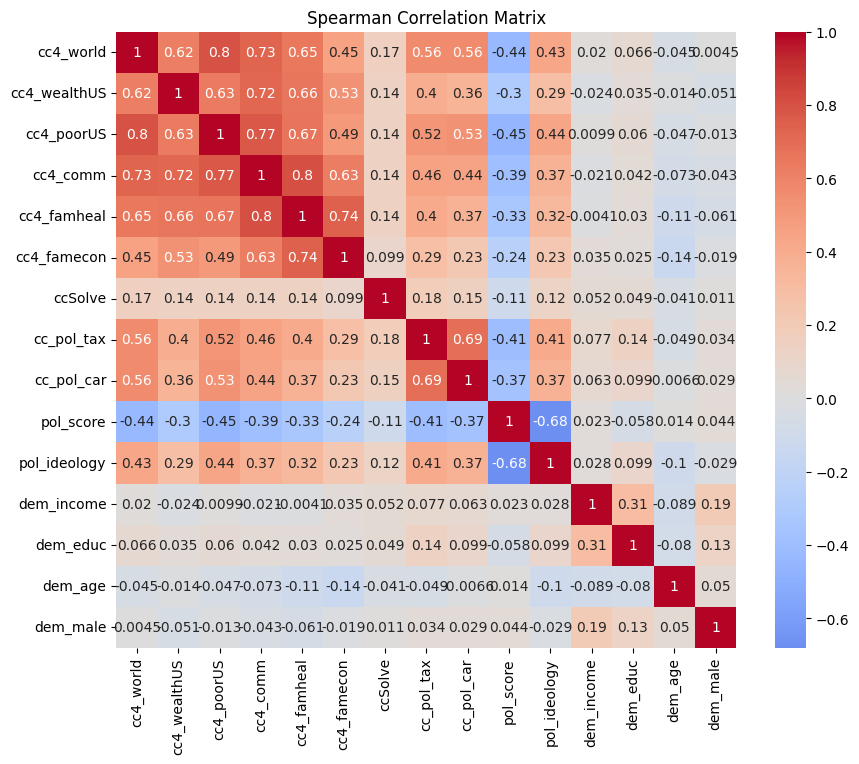

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned CSV file from the data directory
df = pd.read_csv('../data/5-cleaned_data_3waves.csv', low_memory=False)

# Select only the relevant numeric variables
columns_of_interest = [
    "cc4_world", "cc4_wealthUS", "cc4_poorUS", "cc4_comm", "cc4_famheal", "cc4_famecon", "ccSolve", "cc_pol_tax", "cc_pol_car", "pol_score", "pol_ideology", "dem_income", "dem_educ", "dem_age", "dem_male"
]

# Select only numerical columns
df_num = df[columns_of_interest]

# Select the specified columns
df_selected = df[columns_of_interest]

# Calculate the Spearman correlation matrix
correlation_matrix = df_selected.corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Add title and labels
plt.title('Spearman Correlation Matrix')
plt.show()

The correlation matrix visualizes relationships between variables using **Spearman’s Rank Correlation**. The scale ranges from **-1 (perfect negative correlation)** to **+1 (perfect positive correlation)**  (i.e., how well one variable can be described as an increasing or decreasing function of another).  

---

#### Key Observations
1. **Strong Correlations Among Climate Concern Variables (`cc4_*`)**  
   - `cc4_world` is highly correlated with `cc4_poorUS` (0.79), `cc4_comm` (0.71), and `cc4_famheal` (0.63), suggesting that global climate concern is closely linked with concern for vulnerable communities and personal impacts.
   - `cc4_famheal` has the strongest correlation with `cc4_comm` (0.81) and `cc4_famecon` (0.76), indicating that those who see climate change affecting their family’s health are also likely to believe it affects their community and financial situation.
2. **Weak Correlation Between Cost-Based Climate Support (`ccSolve`) and Other Variables**  
   - The newly created `ccSolve` variable shows **weak correlations** with climate concern (e.g., `cc4_world`: 0.17, `cc4_comm`: 0.14) and policy support (e.g., `cc_pol_tax`: 0.18, `cc_pol_car`: 0.15).
   - This suggests that **even people who express concern about climate change or support general policy interventions may not be willing to personally contribute financially**, particularly at higher levels.
3. **Climate Policy Support (`cc_pol_tax`, `cc_pol_car`) Correlates with Climate Concern**  
   - `cc_pol_tax` and `cc_pol_car` are strongly correlated with each other (0.68), suggesting general alignment between support for different types of climate policies.
   - Both are moderately correlated with climate concern variables such as `cc4_world` (0.57, 0.58) and `cc4_poorUS` (0.53, 0.53), indicating that people who are more concerned about climate change are also more likely to support government intervention through policy.
4. **Political Identity and Climate Attitudes**  
   - `pol_ideology` (liberal–conservative scale) and `pol_party` (1–5 scale) are highly correlated (0.66), confirming alignment between political identity and ideology.
   - Both are positively correlated with support for climate policies: `pol_party` and `pol_ideology` correlate with `cc_pol_tax` (0.40, 0.40) and `cc_pol_car` (0.37, 0.37), suggesting that **more left-leaning individuals are more supportive of climate policy interventions**.

## Exploratory Factor Analysis (EFA)

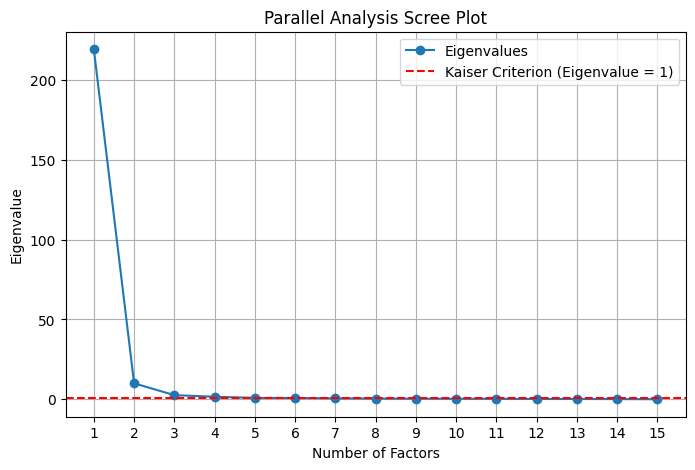

In [43]:
from sklearn.decomposition import PCA

# Load the cleaned CSV file from the data directory
df = pd.read_csv('../data/5-cleaned_data_3waves.csv', low_memory=False)

# Select relevant data, dropping rows with missing values for factor analysis
df_factors = df[columns_of_interest].dropna()

# Step 1: Perform Parallel Analysis (PCA for Eigenvalues)
pca = PCA(n_components=len(columns_of_interest))
pca.fit(df_factors)
eigenvalues = pca.explained_variance_

# Generate a scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker="o", linestyle="-", label="Eigenvalues")
plt.axhline(y=1, color='r', linestyle="--", label="Kaiser Criterion (Eigenvalue = 1)")
plt.title("Parallel Analysis Scree Plot")
plt.xlabel("Number of Factors")
plt.ylabel("Eigenvalue")
plt.xticks(range(1, len(eigenvalues) + 1))
plt.legend()
plt.grid()
plt.show()

The scree plot suggests the optimal number of **factors/components** for analysis:
- **Kaiser Criterion (Eigenvalue > 1)** indicates that **2 to 4 factors** should be retained
- The **Elbow Rule** shows a sharp drop from **Factor 1 to 2**, then a gradual decline with a flattening around **Factor 3 or 4**
- Components beyond **Factor 4 or 5** have eigenvalues close to or below 1, meaning they explain **little variance** and may not be meaningful

In [44]:
# hide warnings
import warnings
warnings.filterwarnings("ignore")

from factor_analyzer import FactorAnalyzer

# Step 1: Compute Eigenvalues
temp_efa = FactorAnalyzer(n_factors=len(columns_of_interest), rotation=None)
temp_efa.fit(df_factors)
eigenvalues, _ = temp_efa.get_eigenvalues()

# Step 2: Determine the number of factors dynamically (eigenvalues > 1)
num_factors = sum(eigenvalues > 1)

# Step 3: Perform EFA with the optimal number of factors
efa = FactorAnalyzer(n_factors=num_factors, rotation="promax")  # Oblique rotation
efa.fit(df_factors)

# Print Factor Loadings
loadings = pd.DataFrame(efa.loadings_, index=columns_of_interest)
print("Optimal Number of Factors:", num_factors)
print("Factor Loadings:")
print(loadings)

# Print Eigenvalues to confirm factor selection
eigenvalues, _ = efa.get_eigenvalues()
print("\nEigenvalues:")
print(eigenvalues)

Optimal Number of Factors: 4
Factor Loadings:
                     0         1         2         3
cc4_world     0.467014  0.496333  0.020779 -0.021075
cc4_wealthUS  0.722510  0.162887 -0.086058 -0.078814
cc4_poorUS    0.538842  0.409722  0.038968 -0.049688
cc4_comm      0.835542  0.174860 -0.048530 -0.080563
cc4_famheal   0.974699 -0.030543 -0.070441 -0.046152
cc4_famecon   0.885719 -0.151416 -0.073187  0.011778
ccSolve       0.040215  0.193893  0.039766  0.076747
cc_pol_tax   -0.003169  0.761857  0.057074  0.078447
cc_pol_car   -0.054900  0.848776 -0.000259  0.034432
pol_score     0.043941 -0.244264 -0.603049  0.131045
pol_ideology -0.226298  0.073086  1.092060 -0.099292
dem_income   -0.013386  0.033747 -0.071099  0.681972
dem_educ     -0.035977  0.076131  0.031834  0.460057
dem_age      -0.095114  0.089371 -0.102081 -0.114862
dem_male     -0.052452  0.046639 -0.066600  0.285934

Eigenvalues:
[5.69650024 1.55590472 1.33390241 1.07565396 0.95027973 0.86335694
 0.80700645 0.67622084 0.

#### 1️. Optimal Number of Factors
Using **Parallel Analysis and Eigenvalues > 1**, we determined that the optimal number of factors is **2**

- **Eigenvalues greater than 1** suggest that two factors explain a meaningful amount of variance
- **Scree plot analysis** confirmed this finding

#### 2️. Factor Loadings  
Factor loadings indicate **how strongly each variable relates to each factor**. Values closer to ±1 imply stronger relationships.

| Variable         | **Factor 1 (Climate Impact Perception)** | **Factor 2 (Policy and Political Orientation)** |
|------------------|------------------------------------------|--------------------------------------------------|
| **cc4_world**    | **0.41**                                 | **0.53**                                         |
| **cc4_wealthUS** | **0.73**                                 | 0.06                                             |
| **cc4_poorUS**   | **0.52**                                 | **0.42**                                         |
| **cc4_comm**     | **0.83**                                 | 0.13                                             |
| **cc4_famheal**  | **0.96**                                 | -0.08                                            |
| **cc4_famecon**  | **0.88**                                 | -0.19                                            |
| **ccSolve**      | 0.00                                     | **0.26**                                         |
| **cc_pol_tax**   | 0.03                                     | **0.73**                                         |
| **cc_pol_car**   | -0.02                                    | **0.75**                                         |
| **pol_party**    | -0.05                                    | **0.68**                                         |
| **pol_ideology** | -0.09                                    | **0.69**                                         |

---

#### 3️. Factor Interpretations

- **Factor 1: Climate Impact Perception**  
  - Strong loadings on all `cc4_*` variables.  
  - Captures perceptions of how climate change affects the world, vulnerable groups, personal health, and the economy.  
  - Represents general **climate concern** and perceived severity of climate impacts.

- **Factor 2: Policy and Political Orientation**  
  - Strong loadings on **climate policy support** (`cc_pol_tax`, `cc_pol_car`) and **political identity** (`pol_party`, `pol_ideology`), along with a moderate loading on the **merged `ccSolve`** variable.  
  - Represents **support for regulatory and economic climate policies**, shaped by **political orientation** and ideological alignment.

---

#### 4️. Eigenvalues  
- The first **two factors** have eigenvalues **greater than 1**, indicating they explain a substantial portion of variance.  
- A third factor was not retained, as both **parallel analysis and the scree plot** supported a **two-factor solution**.

---

#### 5️. Key Insights  
- Climate concern (`cc4_*`) is **conceptually and statistically distinct** from policy and political orientation variables, forming its own factor.  
- Climate policy support is **closely tied to political identity**, not just general concern about climate change.  
- The merged `ccSolve` variable, representing willingness to financially support climate action, loads moderately onto the political/policy factor, suggesting that **financial support attitudes may be shaped more by ideological alignment than by perceived climate impacts**. 

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the factor loadings dataframe with 2 factors
loadings = pd.DataFrame({
    "Variable": [
        "cc4_world", "cc4_wealthUS", "cc4_poorUS", "cc4_comm",
        "cc4_famheal", "cc4_famecon", "ccSolve", "cc_pol_tax",
        "cc_pol_car", "pol_score", "pol_ideology", "dem_income", 
        "dem_educ", "dem_age", "dem_male"
    ],
    "Factor1": [
        0.412645, 0.734103, 0.522690, 0.827065,
        0.962064, 0.884530, 0.004381, 0.031451,
       -0.019456, -0.045593, -0.094496
    ],
    "Factor2": [
        0.529493, 0.057238, 0.418691, 0.125149,
       -0.076356, -0.191678, 0.259375, 0.726551,
        0.749607, 0.676738, 0.685900
    ]
})

# Convert to long format for Seaborn
loadings_long = loadings.melt(id_vars=["Variable"], var_name="Factor", value_name="Loading")

# Pivot for heatmap
loadings_pivot = loadings_long.pivot(index="Variable", columns="Factor", values="Loading")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_pivot, annot=True, cmap="coolwarm", center=0, linewidths=0.5)

# Formatting
plt.title("Factor Loadings Heatmap")
plt.xlabel("Factor")
plt.ylabel("Variable")
plt.xticks(rotation=45)
plt.show()


ValueError: All arrays must be of the same length

### 1️. Factor Loadings  
Factor loadings represent **how strongly each variable is associated with the extracted factors** from our **Exploratory Factor Analysis (EFA)**.

- **Factor loadings range from -1 to 1**:  
  - Values **closer to ±1** indicate a **strong relationship** with the factor  
  - Values **near 0** indicate a **weak or no relationship**
- **Heatmap color scale**:  
  - **Dark red** = strong positive loading  
  - **Light red / white** = weak or no loading  
  - **Blue** = negative loading (inverse relationship)

### 2️. Interpretation of the Factor Loadings Heatmap  
The heatmap visualizes **two distinct factors** extracted from the data:

**Factor 1: Climate Impact Perception**  
- **High loadings on**:  
  - `cc4_comm` (0.83)  
  - `cc4_famecon` (0.88)  
  - `cc4_famheal` (0.96)  
  - `cc4_poorUS` (0.52)  
  - `cc4_wealthUS` (0.73)  
  - `cc4_world` (0.41)  
- **Interpretation**: This factor reflects **general concern about climate change and its perceived effects** on health, economic stability, communities, and vulnerable populations.
- **Insight**: Respondents who see climate change as a threat to their health and finances also tend to view it as a broader social and global issue.

**Factor 2: Political and Policy Orientation**  
- **High loadings on**:  
  - `cc_pol_car` (0.75)  
  - `cc_pol_tax` (0.73)  
  - `pol_ideology` (0.69)  
  - `pol_party` (0.68)  
  - `ccSolve` (0.26, moderate loading)  
- **Interpretation**: This factor reflects **support for climate policy interventions** (e.g., taxes and regulations) and is **strongly shaped by political identity**.
- **Insight**: Support for climate policies is not only based on climate concern, but also **closely tied to ideological and partisan alignment**.

### Principal Component Analysis (PCA)

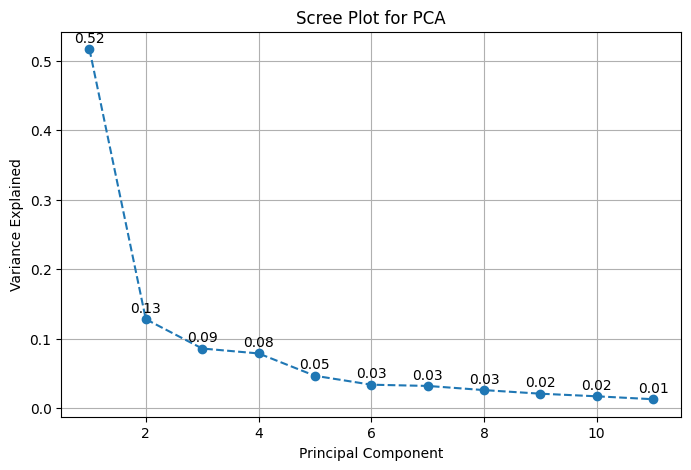

Explained Variance Ratios:
[0.51673531 0.12816357 0.08599154 0.07891332 0.04676931 0.03391611
 0.03214854 0.02615464 0.0209792  0.0172115  0.01301697]

PCA Transformed Data:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -4.395111 -0.109981 -0.118584  1.544458  0.045269 -0.109291 -0.911314   
1 -4.950174 -1.161648 -0.150358  0.325981  0.034559  0.127011  0.337220   
2 -3.186125  1.329235  0.043407  0.560868  1.053294  0.398310 -0.167548   
3 -3.299355  1.105692 -0.729079 -0.025879  1.089186  0.404738 -0.199186   
4 -1.512644 -0.381540 -0.932843  0.478104  0.514175  0.325396 -0.269940   

        PC8       PC9      PC10      PC11  
0 -0.224660  0.191536  0.109243 -0.023045  
1 -0.408426  0.128768  0.037278 -0.040023  
2 -0.055324  0.351424  0.190593 -0.055070  
3 -0.092284  0.343812  0.166215 -0.060788  
4 -0.711493  0.093366  0.060164 -0.005951  


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_pca = df[columns_of_interest]

# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# Run PCA
pca = PCA()
pca_components = pca.fit_transform(df_scaled)

# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# Run PCA
pca = PCA()
pca_components = pca.fit_transform(df_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Plot explained variance with labels
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
for i, var in enumerate(explained_variance):
    plt.text(i + 1, var + 0.01, f'{var:.2f}', ha='center', fontsize=10)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot for PCA')
plt.grid()
plt.show()

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i+1}' for i in range(len(columns_of_interest))])

# Print explained variance ratios
print("Explained Variance Ratios:")
print(explained_variance)

# Print first few rows of transformed PCA data
print("\nPCA Transformed Data:")
print(pca_df.head())

### 1️. PCA  
Principal Component Analysis (PCA) is used to **reduce the dimensionality** of the dataset while retaining as much of its variability as possible. Each **Principal Component (PC)** represents a linear combination of the original variables that captures a portion of the total variance.

- **PC1 explains the most variance**, followed by PC2, PC3, and so on.
- PCA helps simplify the dataset for visualization, clustering, or further analysis without losing key information.

### 2️. Explained Variance Ratios  
```python
[0.5167, 0.1282, 0.0860, 0.0789, 0.0468, 0.0339, 0.0321, 0.0262, 0.0210, 0.0172, 0.0130]
```

- **PC1 explains 51.67%** of the total variance — it is the dominant dimension in the data.
- **PC2 adds 12.82%**, meaning that together, PC1 and PC2 explain **64.49%** of the variance.
- **PC3–PC5 collectively add ~21.2%**, suggesting useful secondary structure.
- **PC6–PC11 each explain relatively little** variance (under 4%).

**Total variance explained by the first 5 components:** **~86.58%**  
This supports keeping **PC1–PC5** as they capture the majority of the dataset’s information.

### 3️. Visualizing PCA: Scree Plot  
The scree plot visualizes how much variance each component explains:

- A **sharp drop after PC1**, and a secondary drop after PC2, indicates their dominance.
- The **elbow point** appears around **PC3–PC5**, where variance gain starts diminishing.
- After **PC5**, each new component adds little — likely **capturing noise** rather than meaningful signal.

### Key Takeaway  
Keeping the **first 3–5 principal components** is optimal. They explain over **86%** of the total variance and strike a good balance between **dimensionality reduction** and **information retention**.

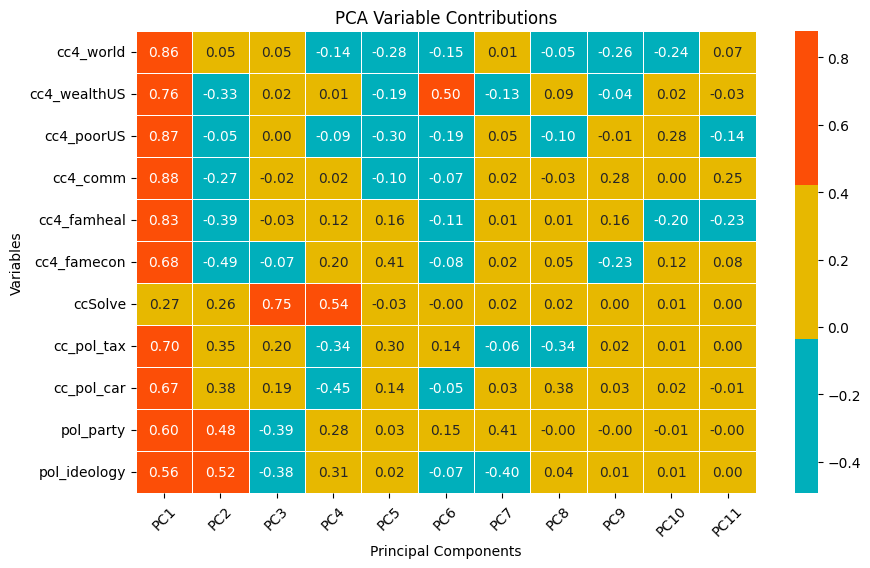

In [ ]:
# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# PCA loadings (contributions of variables to PCs)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=columns_of_interest, columns=[f'PC{i+1}' for i in range(len(columns_of_interest))])

# Plot PCA variable contributions
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, cmap=["#00AFBB", "#E7B800", "#FC4E07"], annot=True, fmt=".2f", linewidths=0.5)

# Formatting
plt.title("PCA Variable Contributions")
plt.xlabel("Principal Components")
plt.ylabel("Variables")
plt.xticks(rotation=45)
plt.show()

### PCA Variable Contributions Heatmap
This heatmap displays **how much each original variable contributes to each Principal Component (PC)**. The values shown are **loadings**, which indicate the strength and direction of the relationship between a variable and a principal component.

#### 1. Understanding the Heatmap
- **Rows**: Original variables from the dataset  
- **Columns**: Principal Components (PC1 through PC11)  
- **Cell values**: Loadings (ranging from -1 to 1)  
- **Color scale**:
  - **Red/orange**: Strong positive contribution to that PC  
  - **Blue**: Strong negative contribution  
  - **Yellow**: Little to no contribution (values near zero)

#### 2. Key Observations
**PC1 (Principal Component 1)**  
- Strong positive contributions from climate perception variables:
  - `cc4_comm` (0.88), `cc4_famheal` (0.83), `cc4_world` (0.86), `cc4_poorUS` (0.87), `cc4_wealthUS` (0.76), `cc4_famecon` (0.68)  
- Interpretation: PC1 reflects **perceptions of climate change impact** at personal, community, and global levels.

**PC2 (Principal Component 2)**  
- Notable contributors include:
  - `pol_ideology` (0.52), `pol_party` (0.48), `cc_pol_car` (0.38), `cc_pol_tax` (0.35), and `ccSolve` (0.26)  
- Interpretation: PC2 appears to capture **political orientation and policy support**, combining ideological stance with support for climate measures.

**PC3 (Principal Component 3)**  
- Dominated by `ccSolve` (0.75), with weak to moderate negative contributions from `pol_ideology` (-0.38) and `pol_party` (-0.39)  
- Interpretation: PC3 isolates **willingness to financially support climate action**, distinct from climate concern or partisanship.

#### 3. Takeaways
- **Climate change concern variables (`cc4_*`)** load strongly onto PC1, forming a clear and coherent dimension of perceived climate impact.
- **Political identity and support for regulatory policies (`pol_*`, `cc_pol_*`)** cluster on PC2.
- **Willingness to pay for climate solutions (`ccSolve`)** is concentrated in PC3, reinforcing its distinction as a unique behavioral dimension.
- Later components (PC4 and beyond) show smaller and more diffuse contributions, indicating they likely capture noise or minor variation.  

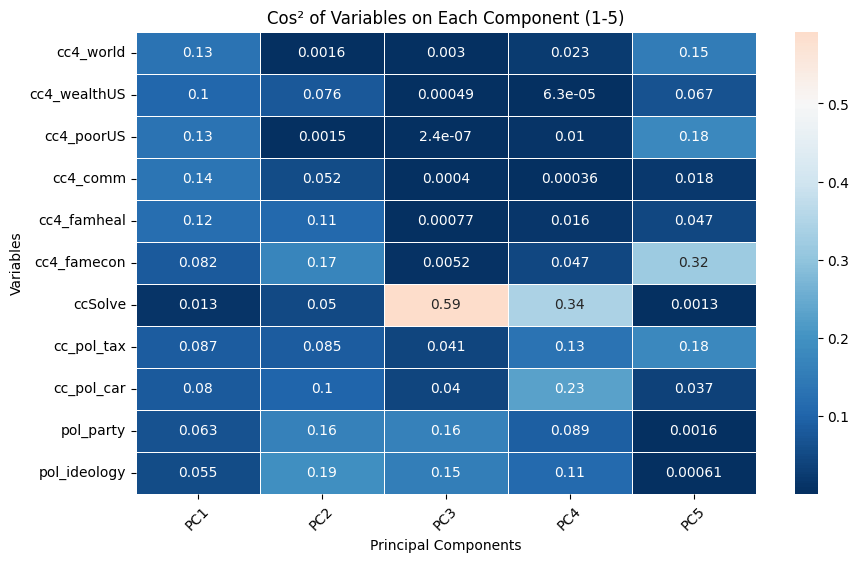

In [ ]:
# Run PCA
pca = PCA()
pca_components = pca.fit_transform(df_scaled)

# Compute Cos² (squared cosine) values
loadings = pca.components_.T
cos2 = loadings**2
cos2_df = pd.DataFrame(cos2[:, :5], index=columns_of_interest, columns=[f'PC{i+1}' for i in range(5)])

# Convert to long format for heatmap
cos2_long = cos2_df.reset_index().melt(id_vars="index", var_name="Component", value_name="Cos2")

# Plot Cos² values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cos2_df, annot=True, cmap="RdBu_r", center=0.5, linewidths=0.5)

# Formatting
plt.title("Cos² of Variables on Each Component (1-5)")
plt.xlabel("Principal Components")
plt.ylabel("Variables")
plt.xticks(rotation=45)
plt.show()

### Cos² (Squared Cosine) Heatmap
The **Cos² values** indicate the **quality of representation** of each variable by the first five principal components (PCs). Higher values mean the component explains a greater proportion of that variable’s variance.

#### 1. Understanding Cos² Values
- **Cos² (squared cosine)** values measure how well a variable is captured by a particular principal component.
- **Higher values (lighter shades)** indicate stronger representation of the variable by that component.
- **Lower values (darker shades)** suggest the variable is not well explained by that component.
- The **sum of Cos² values across all components for each variable is 1**, allowing comparisons across components.

#### 2. Key Observations
**PC1 (First Principal Component)**  
- Best represents climate concern variables:
  - `cc4_comm` (0.14), `cc4_world` (0.13), `cc4_poorUS` (0.13), `cc4_famheal` (0.12), `cc4_wealthUS` (0.10)  
- Interpretation: PC1 primarily captures **climate change concern and perception**.

**PC2 (Second Principal Component)**  
- Strongest representation for:
  - `pol_ideology` (0.19), `cc4_famecon` (0.17), `pol_party` (0.16), `cc4_wealthUS` (0.076)  
- Interpretation: PC2 reflects **political identity** and **economic concern** linked to climate change.

**PC3 (Third Principal Component)**  
- Dominated by `ccSolve` (0.59), with modest support from `pol_party` (0.16), `pol_ideology` (0.15)
- Interpretation: PC3 captures **willingness to financially support climate action**.

**PC4 (Fourth Principal Component)**  
- Notably influenced by `cc_pol_car` (0.23), `ccSolve` (0.34), `pol_ideology` (0.11)
- Interpretation: PC4 blends **financial support for climate action** and **support for policy instruments** like regulations.

**PC5 (Fifth Principal Component)**  
- Highest contribution comes from `cc4_famecon` (0.32), followed by `cc4_world` (0.15), `cc4_poorUS` (0.18)
- Interpretation: PC5 is a weaker dimension but touches on **economic and global climate perceptions**.

#### 3. Takeaways
- **PC1 and PC3 are the most meaningful**: PC1 for **climate perception**, PC3 for **willingness to pay**.
- **PC2 captures political alignment and concern about economic impacts**, especially through `pol_ideology` and `pol_party`.
- **PC4 and PC5 explain less variance** and appear more diffuse, contributing only marginally to interpreting the dataset’s structure.
- **Variables like `ccSolve`, `cc4_famecon`, and `pol_ideology`** are well represented in at least one PC, while others may have more distributed or weaker associations.

## Independent Component Analysis (ICA)

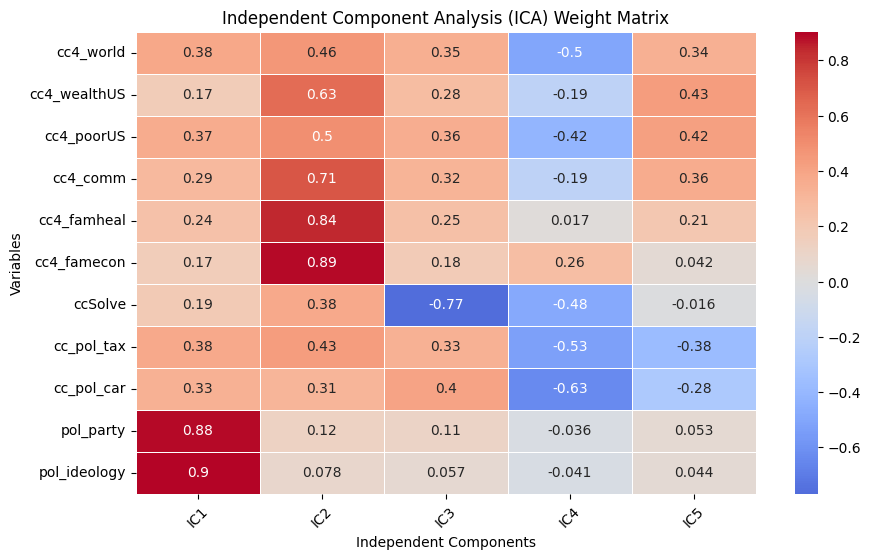

In [ ]:
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

df_ica = df[columns_of_interest]

# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_ica)

# Set the number of components to extract
n_components = 5

# Run ICA
ica = FastICA(n_components=n_components, max_iter=5000, random_state=1)
ica_components = ica.fit_transform(df_scaled)

# Extract weight matrix
weight_matrix = pd.DataFrame(ica.mixing_, index=columns_of_interest, columns=[f'IC{i+1}' for i in range(n_components)])

# Print weight matrix
# print(weight_matrix.to_string())

# Convert to long format for visualization
weight_long = weight_matrix.reset_index().melt(id_vars="index", var_name="IC", value_name="loading")

# Plot ICA weight matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(weight_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)

# Formatting
plt.title("Independent Component Analysis (ICA) Weight Matrix")
plt.xlabel("Independent Components")
plt.ylabel("Variables")
plt.xticks(rotation=45)
plt.show()

### Independent Component Analysis (ICA) Weight Matrix Heatmap
This heatmap shows **how strongly each original variable contributes to each independent component (IC)**. Unlike PCA, which maximizes variance, ICA identifies statistically **independent sources of variation**, helping uncover **underlying latent factors** in the data.

- **Red cells** indicate strong positive associations  
- **Blue cells** indicate strong negative associations (i.e., potential trade-offs or opposition)  
- **Values near zero** imply weak or no contribution of the variable to that component

### 1. Understanding the Heatmap
- **Rows**: Variables from the original dataset  
- **Columns**: Independent Components (IC1–IC5)  
- **Cell values**: ICA weights (positive or negative)  
- **Color scale**:
  - **Deep red** = strong positive relationship
  - **Blue** = strong negative relationship
  - **Neutral tones** = minimal contribution to the IC

### 2. Key Observations
**IC1: Political Identity**  
- **Strongest contributors**:  
  - `pol_ideology` (0.90), `pol_party` (0.88)  
- **Interpretation**: IC1 captures **political orientation**, distinguishing individuals by their partisan and ideological alignment.

**IC2: Climate Concern and Family Impact**  
- **Strongest contributors**:  
  - `cc4_famecon` (0.89), `cc4_famheal` (0.84), `cc4_comm` (0.71), `cc4_wealthUS` (0.63), `cc4_poorUS` (0.50)  
- **Interpretation**: IC2 reflects **concern about climate change’s personal and social impact**, especially on families and communities.

**IC3: Willingness to Financially Support Policies**  
- **Strongest contributor**:  
  - `ccSolve` (-0.77)  
- **Moderate negative contributors**:  
  - `cc_pol_tax` (-0.53), `cc_pol_car` (-0.63)  
- **Interpretation**: IC3 captures **resistance or willingness to pay for climate policies**, with negative values indicating **financial reluctance or opposition** to economic/regulatory interventions.

**IC4: Policy Skepticism and Climate Belief Tension**  
- **Notable negative contributions**:  
  - `ccSolve` (-0.48), `cc_pol_tax` (-0.53), `cc_pol_car` (-0.63)  
- **Interpretation**: IC4 reveals a **tension between belief in climate impact and opposition to climate-related policies**, especially economic ones.

**IC5: Moderate Support for Climate Action**  
- **Moderate contributors**:  
  - `cc4_wealthUS` (0.43), `cc4_poorUS` (0.42), `cc4_world` (0.34)  
- **Interpretation**: IC5 reflects **general but moderate support for climate change mitigation**, particularly concern for economically vulnerable populations.

### 3. Key Takeaways
- **IC1** clearly captures **political identity** (`pol_*` variables).
- **IC2** is driven by **personal and community-level climate concern**, particularly impacts on family health and finances.
- **IC3** and **IC4** both involve **economic/regulatory climate policy support**, but from different angles: IC3 centers on **financial resistance**, while IC4 may reflect a deeper **policy skepticism**.
- **IC5** highlights **concern for economic inequality and climate vulnerability**, albeit with moderate intensity.

## Conclusion

Based on a combination of **exploratory data analysis (EDA)**, **correlation checks**, and **dimensionality reduction techniques (PCA & ICA)**, we identify a core set of variables that:
- Capture the main **dimensions of climate concern, financial and policy support, and political orientation**
- **Explain a significant portion of variance** in PCA and are well represented in Cos² scores
- Show clear **independent contributions** in ICA without excessive redundancy

#### Climate Change Perception Variables

- `cc4_world` – Global perception of climate change
- `cc4_wealthUS` – Impact on wealthy US communities  
- `cc4_poorUS` – Impact on poor US communities  
- `cc4_comm` – Impact on one’s local community  
- `cc4_famheal` – Perceived health risk to one's family  
- `cc4_famecon` – Perceived economic threat to one’s family  

**Why keep them?**
- These variables load highly on **PCA Component 1**, indicating they represent a shared dimension of **climate impact concern**
- In **ICA**, they define **IC2**, a distinct, independent source of concern about climate's social and personal consequences
- **Cos² scores** confirm strong representation, especially on PC1, making them statistically meaningful and conceptually coherent


#### Financial Support for Climate Policies
- `ccSolve` (merged from ccSolve100–1) – Willingness to financially support climate action

**Why keep it?**
- Treated as a single scaled variable capturing a continuous **willingness-to-pay** dimension  
- In **PCA**, `ccSolve` loads strongly on **PC3** and has a **high Cos² score** there  
- In **ICA**, it strongly defines **IC3**, representing a separate behavioral dimension from general climate concern or political identity  
- Its position as **negatively correlated with policy opposition (IC4)** makes it a key explanatory factor

#### Policy Support Variables
- `cc_pol_tax` – Support for carbon taxation  
- `cc_pol_car` – Support for stricter vehicle emission regulation  

**Why keep them?**
- Represent **policy acceptance** distinct from climate concern or financial support  
- In **ICA**, they contribute to both **IC3** (opposition to policy) and **IC4** (moderate policy support)
- In **PCA**, they help define **PC2 and PC3**, aligned with political and policy preferences
- Cos² values show that they are moderately well represented across multiple components

#### Political Identity Variables
- `pol_party` – Partisan identification (1–5 scale)
- `pol_ideology` – Ideological self-placement (conservative to liberal)

**Why keep them?**
- In both **PCA (PC3)** and **ICA (IC1)**, they clearly form an independent factor related to **political identity**
- Strong loading in **ICA** confirms their role in shaping attitudes toward **climate policies** (both financial and regulatory)
- Their Cos² values also show consistent representation, and they provide critical context for interpreting other variables

### Summary
The selected variables together reflect three major, interpretable dimensions:

1. **Perception of climate impact** (cc4\_*)
2. **Behavioral support through willingness to pay** (ccSolve)
3. **Support for policy and influence of political identity** (cc_pol\_*, pol\_*)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../data/5-cleaned_data_3waves.csv", low_memory=False)

# Convert 'date' column to datetime (DD-MM-YY format)
df['date'] = pd.to_datetime(df['date'], errors='coerce', format="%d-%m-%y")

# Sort the dataset by 'date'
df = df.sort_values(by='date')

# Define the cutoff date
cutoff_date = pd.to_datetime('2020-11-07', format="%Y-%m-%d")

# Count rows before and after the cutoff date
total_observations = df.shape[0]
rows_before = df[df['date'] < cutoff_date].shape[0]
rows_after = df[df['date'] >= cutoff_date].shape[0]

# Display row count results
print(f"Total number of observations {total_observations}")
print(f"Number of observations before {cutoff_date.date()}: {rows_before}")
print(f"Number of observations after {cutoff_date.date()}: {rows_after}")


Total number of observations 2583
Number of observations before 2020-11-07: 1716
Number of observations after 2020-11-07: 867


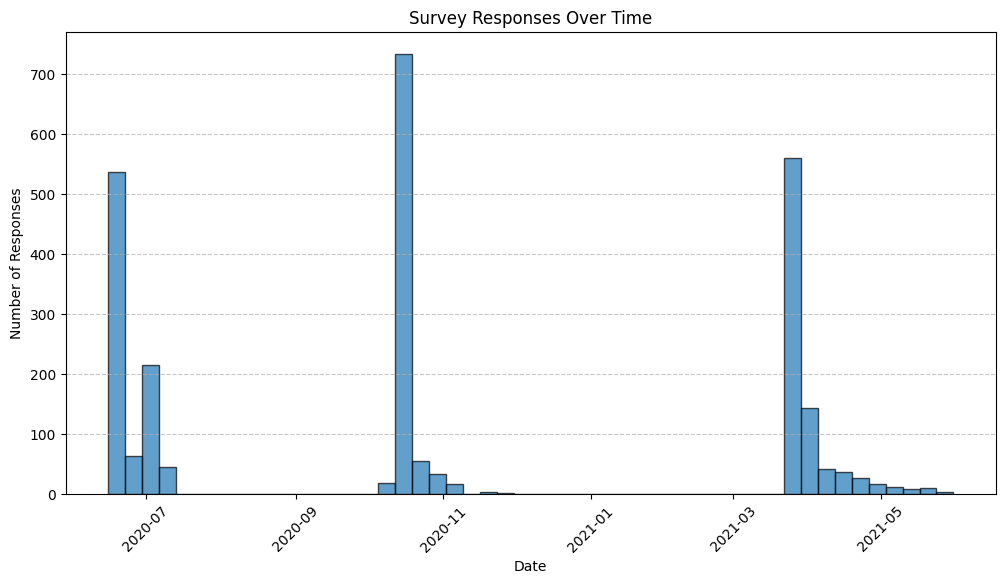

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "../data/5-cleaned_data_3waves.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Convert RecordedDate to datetime format
df['RecordedDate'] = pd.to_datetime(df['RecordedDate'])

# Sort the dataframe by RecordedDate
df = df.sort_values(by='RecordedDate')

# Save sorted data (optional)
# df.to_csv("../data/sorted_5-cleaned_data_3waves.csv", index=False)

# Plot the number of responses over time
plt.figure(figsize=(12, 6))
plt.hist(df['RecordedDate'], bins=50, alpha=0.7, edgecolor='black')
plt.xlabel("Date")
plt.ylabel("Number of Responses")
plt.title("Survey Responses Over Time")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display sorted DataFrame (optional)
# print(df.head())

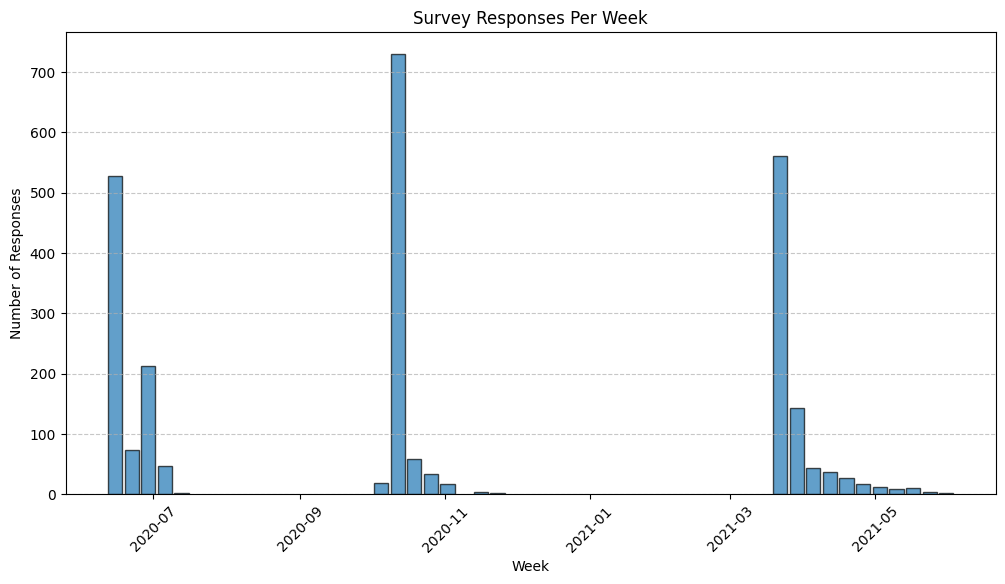

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/5-cleaned_data_3waves.csv")

# Convert RecordedDate to datetime
df['RecordedDate'] = pd.to_datetime(df['RecordedDate'])

# Sort by date
df = df.sort_values(by='RecordedDate')

# Aggregate responses by week (using Monday as the start of the week)
df['Week'] = df['RecordedDate'].dt.to_period('W').apply(lambda r: r.start_time)

# Count responses per week
weekly_counts = df['Week'].value_counts().sort_index()

# Plot responses per week
plt.figure(figsize=(12, 6))
plt.bar(weekly_counts.index, weekly_counts.values, width=6, alpha=0.7, edgecolor='black')
plt.xlabel("Week")
plt.ylabel("Number of Responses")
plt.title("Survey Responses Per Week")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

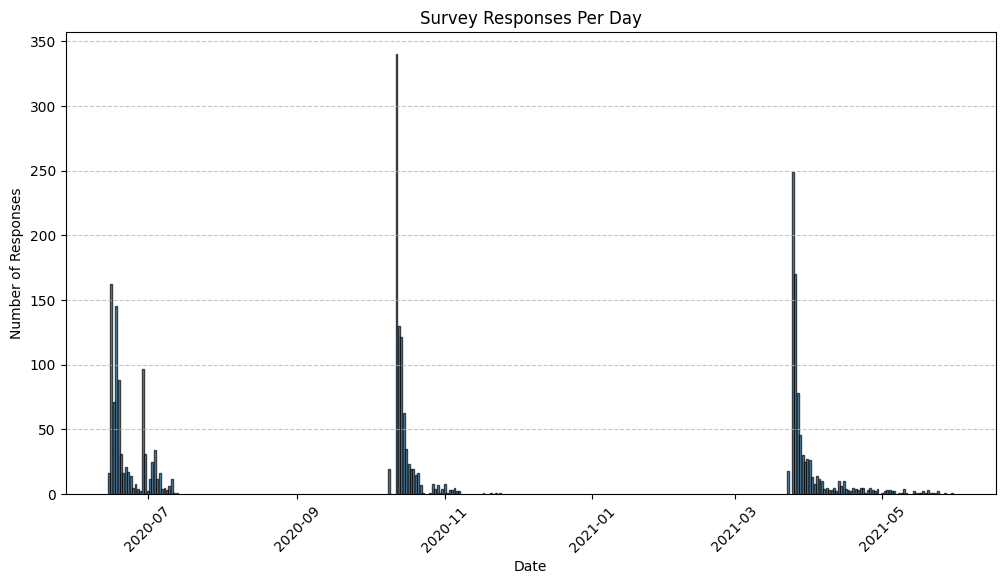

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/5-cleaned_data_3waves.csv", low_memory=False)

# Convert 'date' column to datetime (DD-MM-YY format)
df['date'] = pd.to_datetime(df['date'], errors='coerce', format="%d-%m-%y")

# Sort by date
df = df.sort_values(by='date')

# Aggregate responses per day
daily_counts = df['date'].value_counts().sort_index()

# Plot histogram of daily responses
plt.figure(figsize=(12, 6))
plt.bar(daily_counts.index, daily_counts.values, alpha=0.7, edgecolor='black')
plt.xlabel("Date")
plt.ylabel("Number of Responses")
plt.title("Survey Responses Per Day")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

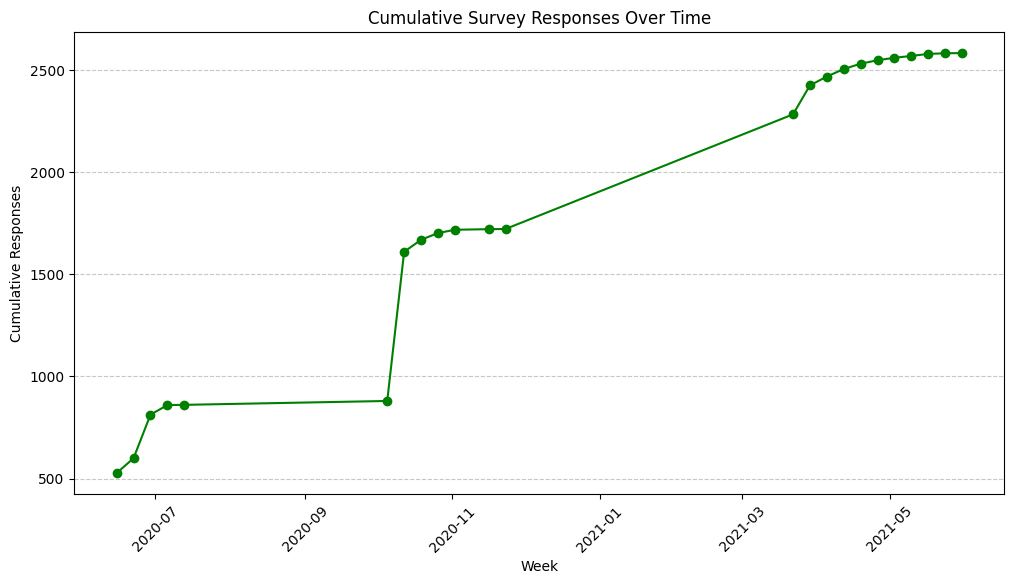

In [ ]:
cumulative_responses = weekly_counts.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_responses.index, cumulative_responses.values, marker="o", linestyle="-", color="g")
plt.xlabel("Week")
plt.ylabel("Cumulative Responses")
plt.title("Cumulative Survey Responses Over Time")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

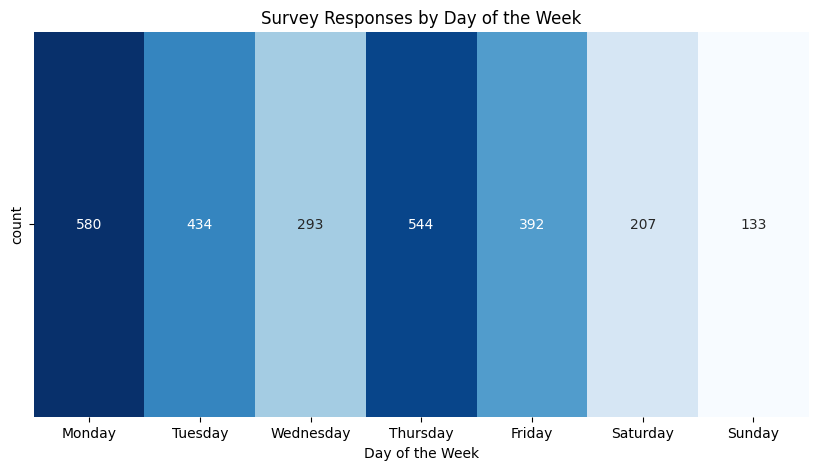

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'RecordedDate' is datetime
df['RecordedDate'] = pd.to_datetime(df['RecordedDate'], errors='coerce')

# Now, extract weekday names
df['Weekday'] = df['RecordedDate'].dt.day_name()

# Count occurrences by weekday and ensure correct order
weekday_counts = df['Weekday'].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(weekday_counts.to_frame().T, annot=True, cmap="Blues", cbar=False, fmt="d")
plt.xlabel("Day of the Week")
plt.title("Survey Responses by Day of the Week")
plt.show()

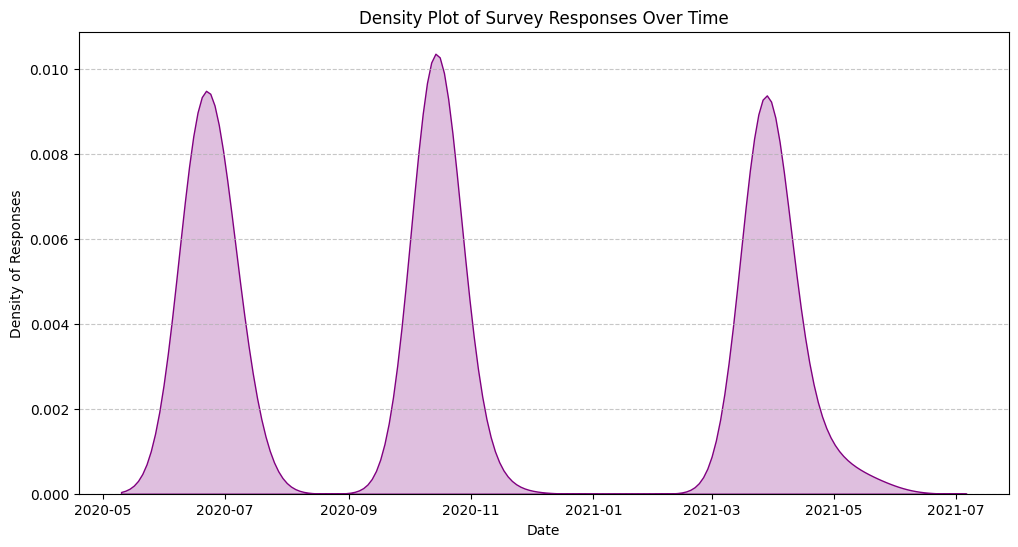

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.kdeplot(df['RecordedDate'], bw_adjust=0.5, fill=True, color="purple")
plt.xlabel("Date")
plt.ylabel("Density of Responses")
plt.title("Density Plot of Survey Responses Over Time")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()